# Lya Multiple Scattering

In [2]:
import Multiple_scattering
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({"text.usetex": True,
                     "font.family": "Times new roman"})
colors =  ['#377eb8', '#ff7f00', '#4daf4a',
           '#f781bf', '#a65628', '#984ea3',
           '#999999', '#e41a1c', '#dede00']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

def run_Lya_multiple_scattering(cosmo_params,sim_params,**kwargs):
    cosmo_params_dict = cosmo_params.copy()
    sim_params_dict = sim_params.copy()
    for k, v in kwargs.items():
        if k in cosmo_params:
           cosmo_params_dict[k] = v
        if k in sim_params:
           sim_params_dict[k] = v
    cosmo_params = Multiple_scattering.COSMO_PARAMS(cosmo_params_dict)
    sim_params = Multiple_scattering.SIM_PARAMS(sim_params_dict)    
    cosmo_params.run_CLASS()
    all_photons_data = Multiple_scattering.ALL_PHOTONS_DATA(cosmo_params,sim_params)
    all_photons_data.simulate_N_photons()
    return all_photons_data

# Set cosmological parameters
cosmo_params = {}
cosmo_params["h"] = 0.6736 # Hubble constant (in 100 km/sec/Mpc)
cosmo_params["Omega_m"] = 0.3153 # Current matter density parameter
cosmo_params["Omega_b"] = 0.0493 # Current baryon density parameter
cosmo_params["A_s"] = 2.1e-9 # Amplitude of primordial curvator fluctuations in the pivot scale 0.05 Mpc^-1
cosmo_params["n_s"] = 0.9649 # Spectral tilt of primordial curvator fluctuations
cosmo_params["T"] = 1.e4 # Temperature of the IGM in the simulation, in Kelvin
cosmo_params["x_HI"] = 1. # Fraction of neutral hydrogen in the simulation
# Set simulation parameters
sim_params = {}
sim_params["z_abs"] = 10. # Redshift where the photon was absorbed
#sim_params["x_stop"] = 1. # Distance from the source to stop the simulation, in units of the diffusion scale
sim_params["N"] = 1000 # Number of photons to be simulated
sim_params["Delta_L"] = 0.2 # "Grid" resolution, in Mpc
sim_params["Delta_nu_initial"] = 2.e-4 # Initial frequency difference from Lyman alpha, in units of Lyman alpha frequency
sim_params["INCLUDE_VELOCITIES"] = True # Do we want peculiar velocities?
sim_params["NO_CORRELATIONS"] = False # Do we want to use the correlations in the velocity field?
sim_params["USE_INTERPOLATION_TABLES"] = True # Do we want to use interpolation tables for velocity?
sim_params["INCLUDE_TEMPERATURE"] = True # Do we want to include finite temperature
sim_params["ANISOTROPIC_SCATTERING"] = True # Do we want to draw mu from a unifrom distribution?
sim_params["INCLUDE_RECOIL"] = True # Do we want to account for atom recoil during scattering?
sim_params["STRAIGHT_LINE"] = False # Do we want to assume straight-line approximation?
sim_params["CROSS_SECTION"] = 'LORENTZIAN' # Type of cross-section. Can be LORENTZIAN or PEEBLES.

## Compare trajectories

In [97]:
all_photons_data_ms = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    N = 5, Delta_L=0.08
)

all_photons_data_sl = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    STRAIGHT_LINE = True,
    INCLUDE_VELOCITIES = False,
    INCLUDE_RECOIL = False,
    N = 1,
)

Now making interpolation tables...


100%|██████████| 1/1 [00:00<00:00, 43.76photons/s]


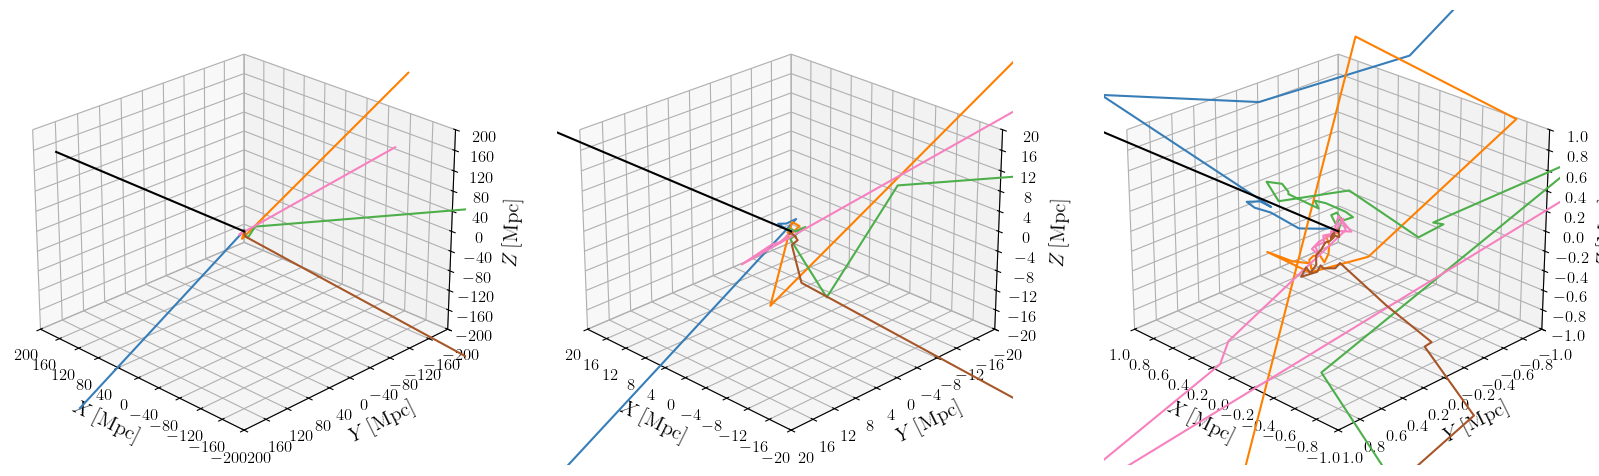

In [118]:
scales = [200,20,1]
fig = plt.figure(figsize=(20,40))
for scale_ind, scale in enumerate(scales):
    ax =  fig.add_subplot(1,3,scale_ind+1,projection='3d')
    for n in range(5):
        all_photons_data_ms.plot_photon_trajectory(n,color=colors[n],ax=ax,scale=scale)
    all_photons_data_sl.plot_photon_trajectory(0,color='k',ax=ax,scale=scale)
    ax.view_init(elev=25., azim=135.)

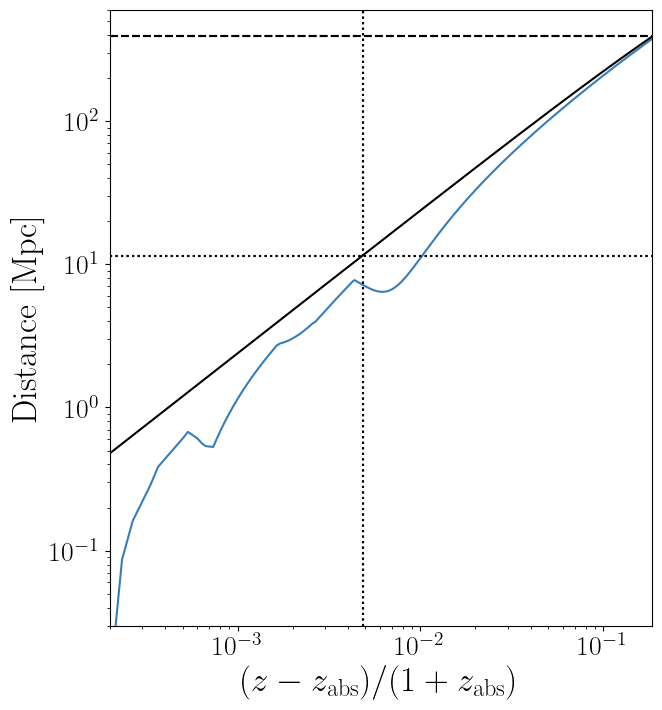

In [144]:
"""
fig, ax = plt.subplots(1,2,figsize=(16,8))
for n in range(5):
    all_photons_data_ms.plot_distance(n,color=colors[n],ax=ax[0])
    all_photons_data_ms.plot_apparent_frequency(n,color=colors[n],ax=ax[1])
all_photons_data_sl.plot_distance(0,color='k',ax=ax[0])
all_photons_data_sl.plot_apparent_frequency(0,color='k',ax=ax[1])
ax[0].set_xlim(all_photons_data_sl.sim_params.Delta_nu_initial,all_photons_data_sl.nu_stop-1.)
ax[1].set_xlim(all_photons_data_sl.sim_params.Delta_nu_initial,all_photons_data_sl.nu_stop-1.)
ax[0].set_ylim([0.03,600])
ax[1].set_ylim([1e-4,0.3]);
"""
#"""
PLOT_DISTANCE = True
fig, ax = plt.subplots(1,1,figsize=(7,8))
for n in range(1):
    if PLOT_DISTANCE:
        all_photons_data_ms.plot_distance(n,color=colors[n],ax=ax)
    else:
        all_photons_data_ms.plot_apparent_frequency(n,color=colors[n],ax=ax)
if PLOT_DISTANCE:
    all_photons_data_sl.plot_distance(0,color='k',ax=ax)
    ax.set_ylim([0.03,600])
else:
    all_photons_data_sl.plot_apparent_frequency(0,color='k',ax=ax)
    ax.set_ylim([1e-4,0.3])
ax.set_xlim(all_photons_data_sl.sim_params.Delta_nu_initial,all_photons_data_sl.nu_stop-1.);
#"""

## Check convergence

### Different $N$

In [7]:
all_photons_data_1000 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    N=1000
)
all_photons_data_2000 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    N=2000
)

Now making interpolation tables...


100%|██████████| 1000/1000 [02:18<00:00,  7.23photons/s]


Now making interpolation tables...


100%|██████████| 2000/2000 [04:30<00:00,  7.39photons/s]


In [8]:
sim_data_1000 = Multiple_scattering.SIM_DATA(all_photons_data_1000)
sim_data_2000 = Multiple_scattering.SIM_DATA(all_photons_data_2000)

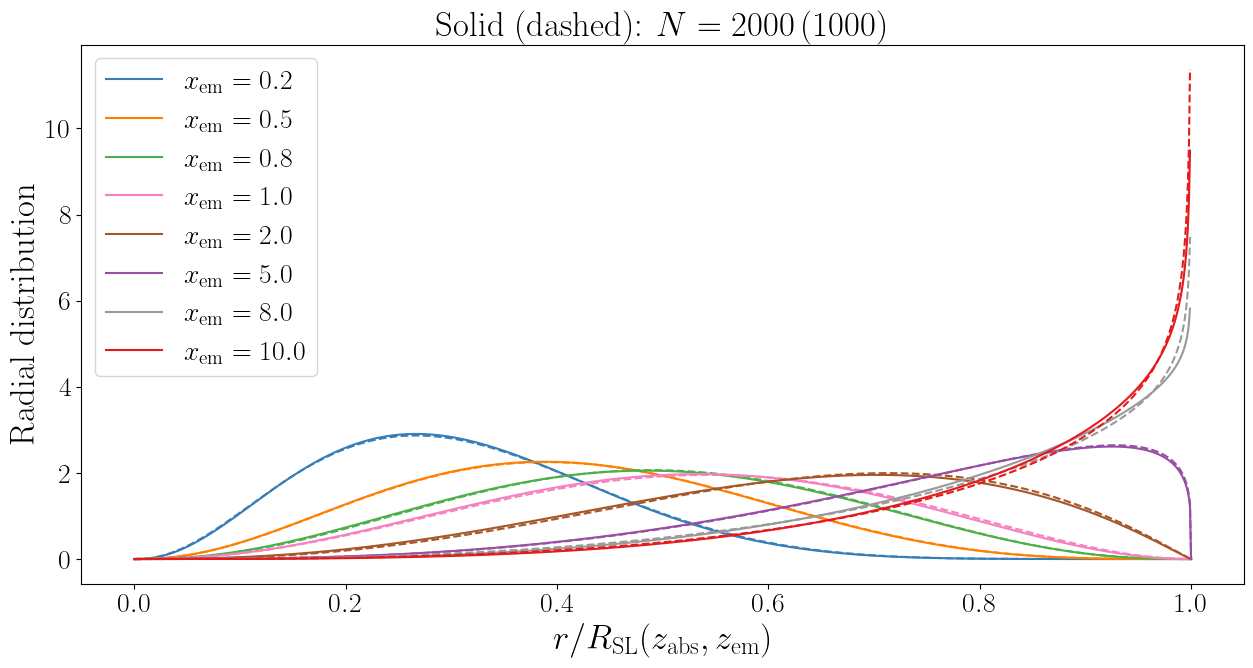

In [9]:
x_em_list = [0.2, 0.5, 0.8, 1., 2., 5., 8., 10.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_2000.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_1000.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title(f"Solid (dashed): $N={sim_data_2000.sim_params.N}\\,({sim_data_1000.sim_params.N})$",fontsize=25);

(1, 80)

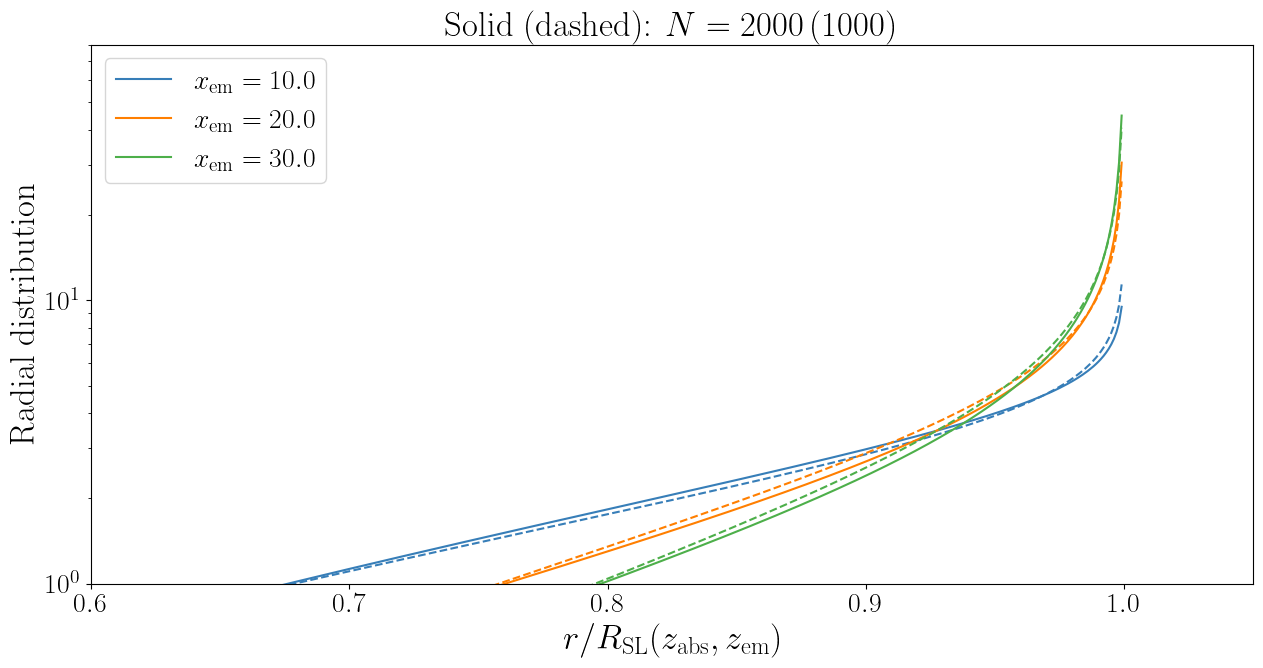

In [10]:
x_em_list = [10., 20., 30.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_2000.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_1000.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title(f"Solid (dashed): $N={sim_data_2000.sim_params.N}\\,({sim_data_1000.sim_params.N})$",fontsize=25);
ax.set_yscale("log")
ax.set_xlim([0.6,1.05])
ax.set_ylim([1,80])

### Different $\Delta L$

In [11]:
all_photons_data_01 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    Delta_L=0.1
)
all_photons_data_02 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    Delta_L=0.2
)

Now making interpolation tables...


100%|██████████| 1000/1000 [04:34<00:00,  3.64photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [02:15<00:00,  7.38photons/s]


In [12]:
sim_data_01 = Multiple_scattering.SIM_DATA(all_photons_data_01)
sim_data_02 = Multiple_scattering.SIM_DATA(all_photons_data_02)

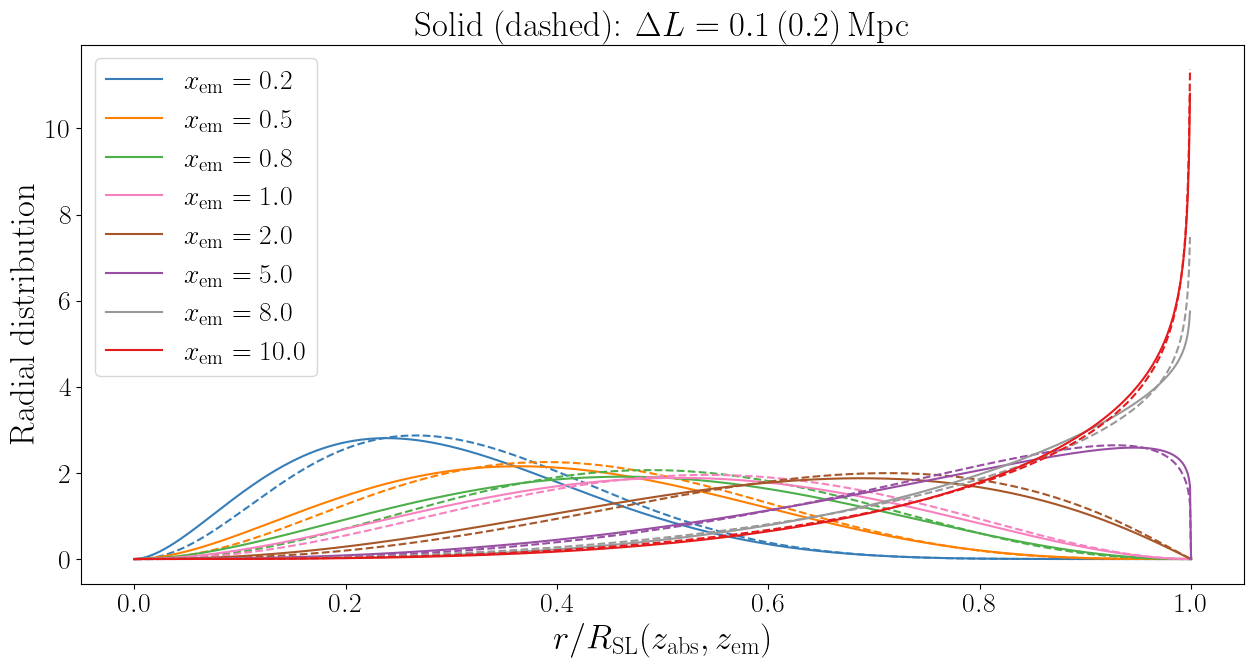

In [13]:
x_em_list = [0.2, 0.5, 0.8, 1., 2., 5., 8., 10.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_01.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_02.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title(f"Solid (dashed): $\\Delta L={sim_data_01.sim_params.Delta_L}\\,({sim_data_02.sim_params.Delta_L})"+"\\,\\mathrm{Mpc}$",fontsize=25);

(1, 80)

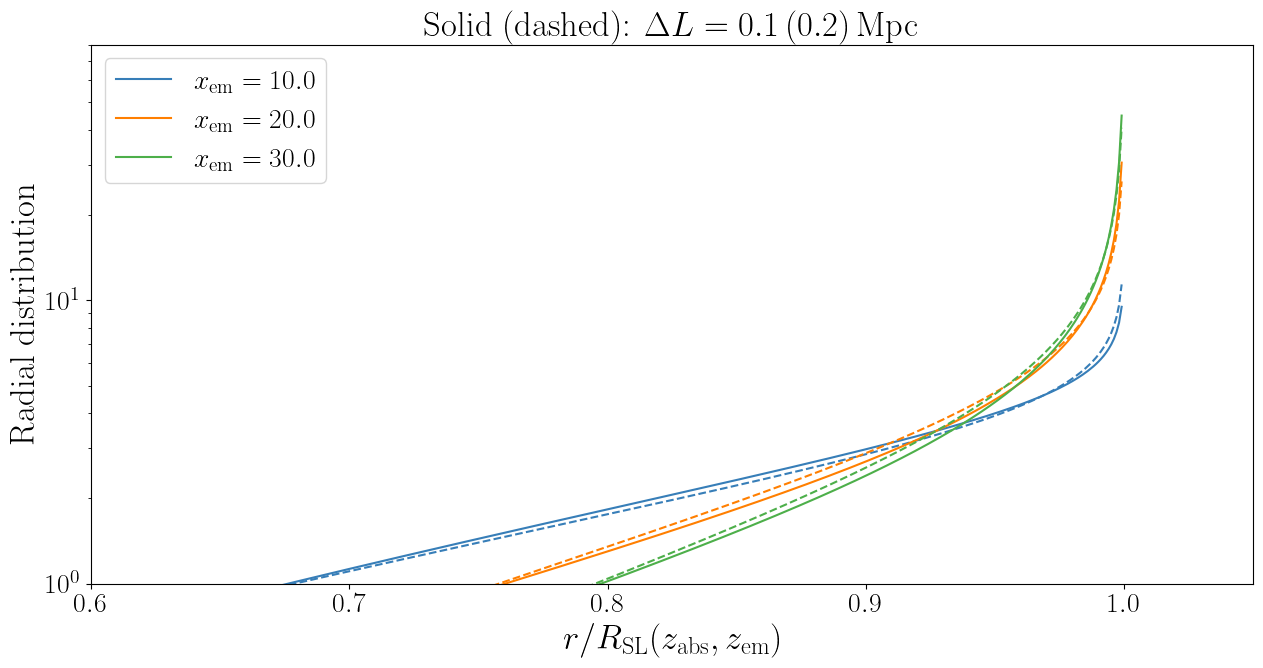

In [14]:
x_em_list = [10., 20., 30.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_2000.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_1000.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title(f"Solid (dashed): $\\Delta L={sim_data_01.sim_params.Delta_L}\\,({sim_data_02.sim_params.Delta_L})"+"\\,\\mathrm{Mpc}$",fontsize=25)
ax.set_yscale("log")
ax.set_xlim([0.6,1.05])
ax.set_ylim([1,80])

## Study physical effects

### Different $T$

In [162]:
all_photons_data_T0 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    T=0.
)
all_photons_data_T1e4 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    T=1.e4
)

Now making interpolation tables...


100%|██████████| 1000/1000 [02:15<00:00,  7.39photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [02:18<00:00,  7.20photons/s]


In [163]:
sim_data_T0 = Multiple_scattering.SIM_DATA(all_photons_data_T0)
sim_data_T1e4 = Multiple_scattering.SIM_DATA(all_photons_data_T1e4)

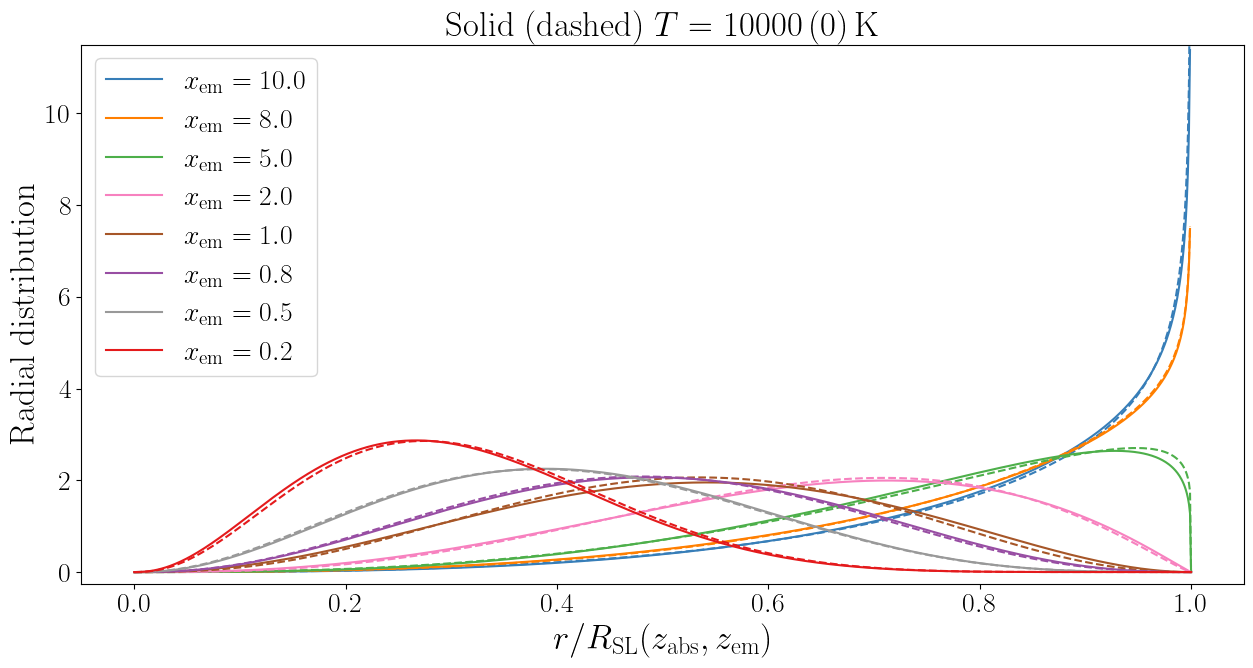

In [165]:
x_em_list = [0.2, 0.5, 0.8, 1., 2., 5., 8., 10.][::-1]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_T1e4.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_T0.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title(f"Solid (dashed) $T={all_photons_data_T1e4.cosmo_params.T:.0f}\\,({all_photons_data_T0.cosmo_params.T:.0f})"+"\\,\\mathrm{K}$",fontsize=25)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.25,11.5])
ax.legend(loc="upper left",fontsize=20);

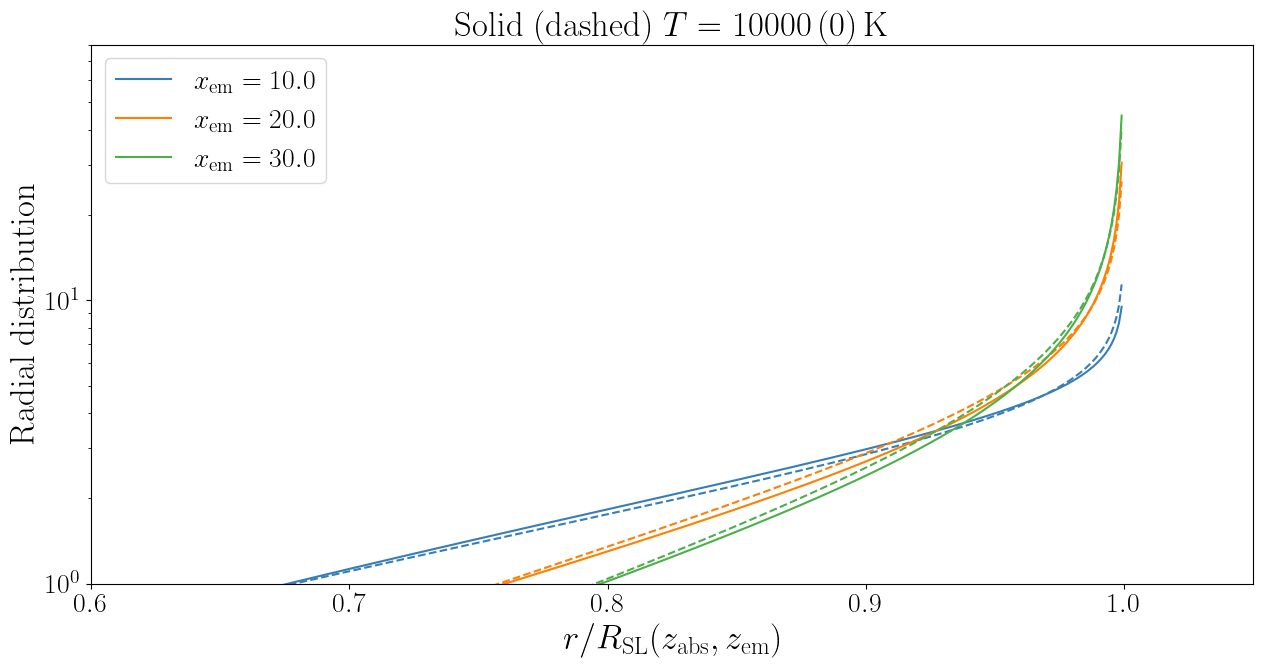

In [18]:
x_em_list = [10., 20., 30.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_2000.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_1000.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title(f"Solid (dashed) $T={all_photons_data_T1e4.cosmo_params.T:.0f}\\,({all_photons_data_T0.cosmo_params.T:.0f})"+"\\,\\mathrm{K}$",fontsize=25)
ax.set_yscale("log")
ax.set_xlim([0.6,1.05])
ax.set_ylim([1,80]);

### Different $x_\mathrm{HI}$

In [3]:
all_photons_data_xHI1 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    x_HI=1.,
)
all_photons_data_xHI05 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    x_HI=0.5,
)

Now making interpolation tables...


100%|██████████| 1000/1000 [02:28<00:00,  6.75photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [02:22<00:00,  7.02photons/s]


In [4]:
sim_data_xHI1 = Multiple_scattering.SIM_DATA(all_photons_data_xHI1)
sim_data_xHI05 = Multiple_scattering.SIM_DATA(all_photons_data_xHI05)

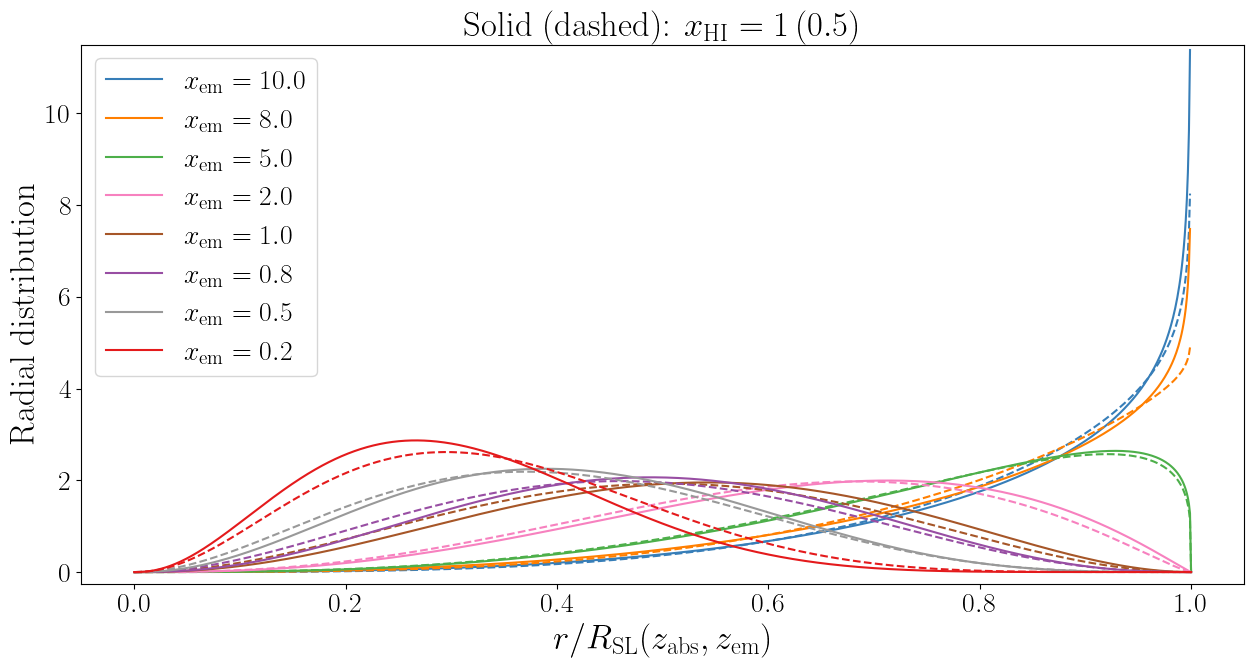

In [168]:
x_em_list = [0.2, 0.5, 0.8, 1., 2., 5., 8., 10.][::-1]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_xHI1.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_xHI05.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title("Solid (dashed): $x_\\mathrm{HI}"+f"={all_photons_data_xHI1.cosmo_params.x_HI:.0f}\\,({all_photons_data_xHI05.cosmo_params.x_HI})$",fontsize=25)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.25,11.5])
ax.legend(loc="upper left",fontsize=20);

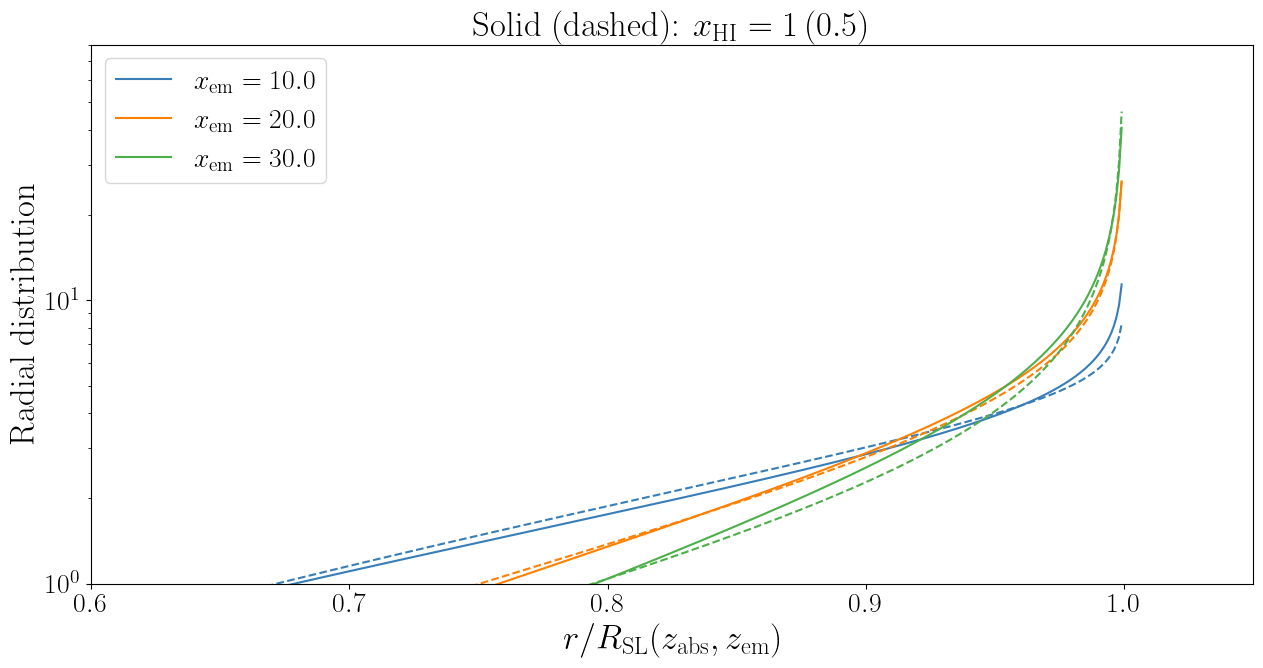

In [6]:
x_em_list = [10., 20., 30.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_xHI1.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_xHI05.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title("Solid (dashed): $x_\\mathrm{HI}"+f"={all_photons_data_xHI1.cosmo_params.x_HI:.0f}\\,({all_photons_data_xHI05.cosmo_params.x_HI})$",fontsize=25)
ax.set_yscale("log")
ax.set_xlim([0.6,1.05])
ax.set_ylim([1,80]);

### Velocity effects

In [7]:
all_photons_data_with_v = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    INCLUDE_VELOCITIES = True,
)
all_photons_data_without_v = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    INCLUDE_VELOCITIES = False,
)

Now making interpolation tables...


100%|██████████| 1000/1000 [00:20<00:00, 49.02photons/s]


In [8]:
sim_data_with_v = Multiple_scattering.SIM_DATA(all_photons_data_with_v)
sim_data_without_v = Multiple_scattering.SIM_DATA(all_photons_data_without_v)

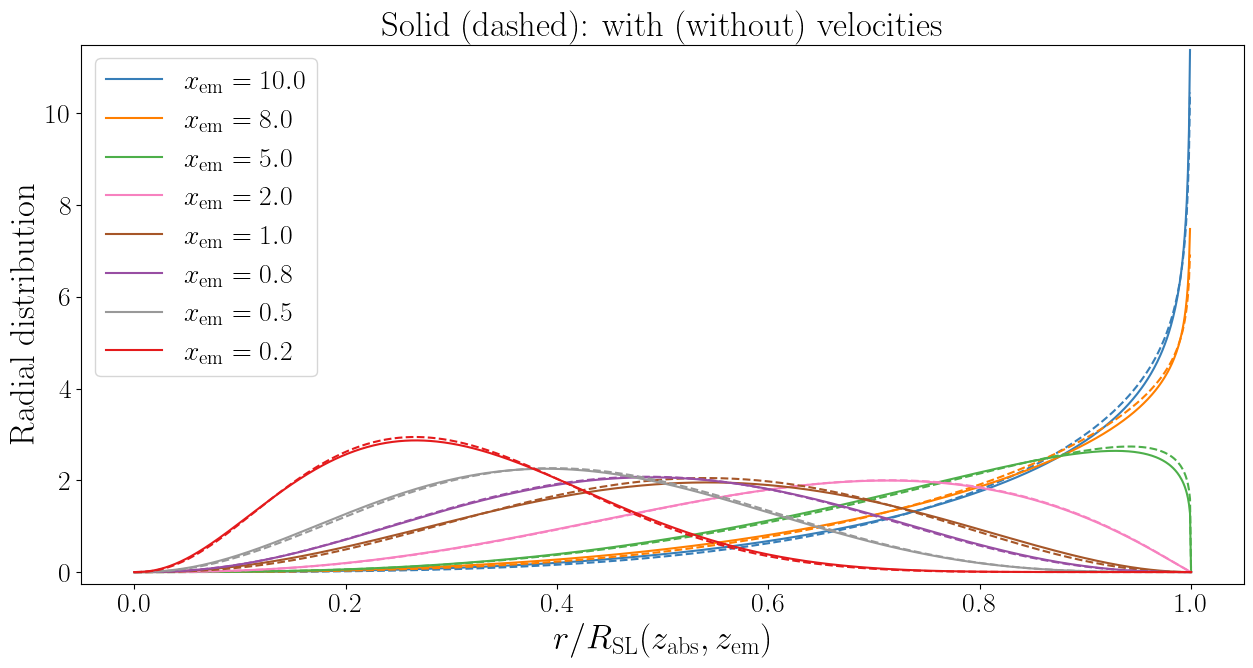

In [160]:
x_em_list = [0.2, 0.5, 0.8, 1., 2., 5., 8., 10.][::-1]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_with_v.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_without_v.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title("Solid (dashed): with (without) velocities",fontsize=25)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.25,11.5]);

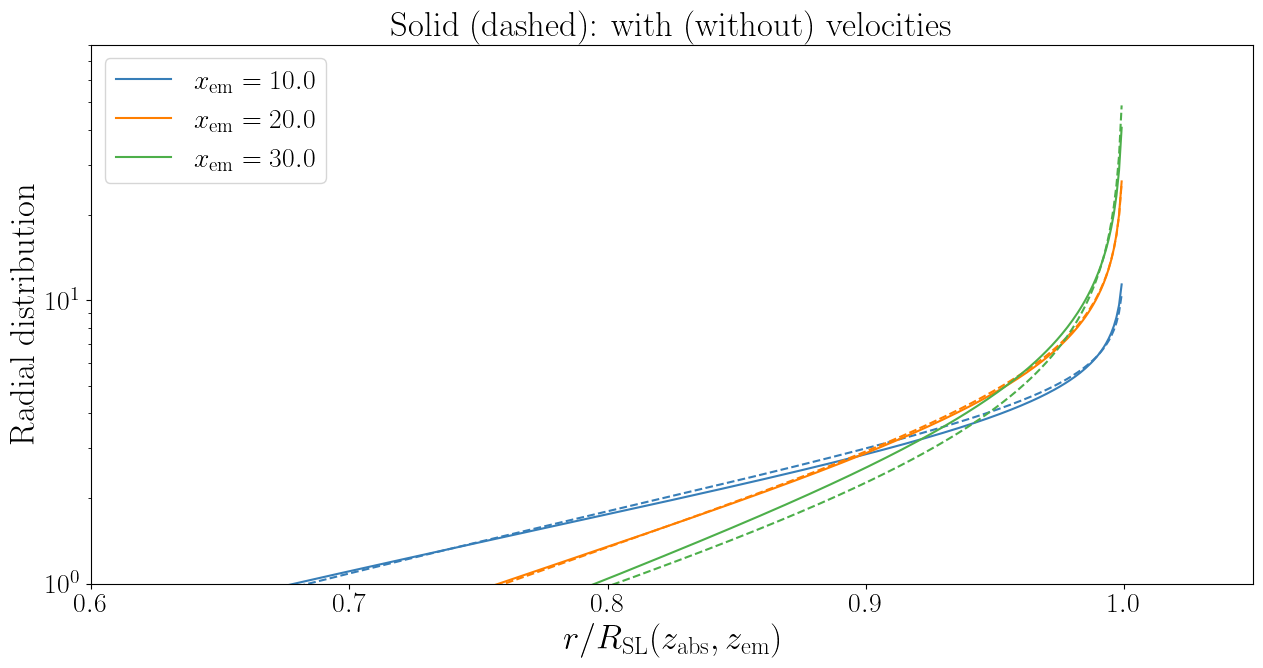

In [10]:
x_em_list = [10., 20., 30.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_with_v.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_without_v.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title("Solid (dashed): with (without) velocities",fontsize=25)
ax.set_yscale("log")
ax.set_xlim([0.6,1.05])
ax.set_ylim([1,80]);

### Velocity correlations

In [11]:
all_photons_data_with_corr = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    NO_CORRELATIONS = False,
)
all_photons_data_without_corr = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    NO_CORRELATIONS = True,
)

Now making interpolation tables...


100%|██████████| 1000/1000 [02:23<00:00,  6.97photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [03:36<00:00,  4.62photons/s]


In [12]:
sim_data_with_corr = Multiple_scattering.SIM_DATA(all_photons_data_with_corr)
sim_data_without_corr = Multiple_scattering.SIM_DATA(all_photons_data_without_corr)

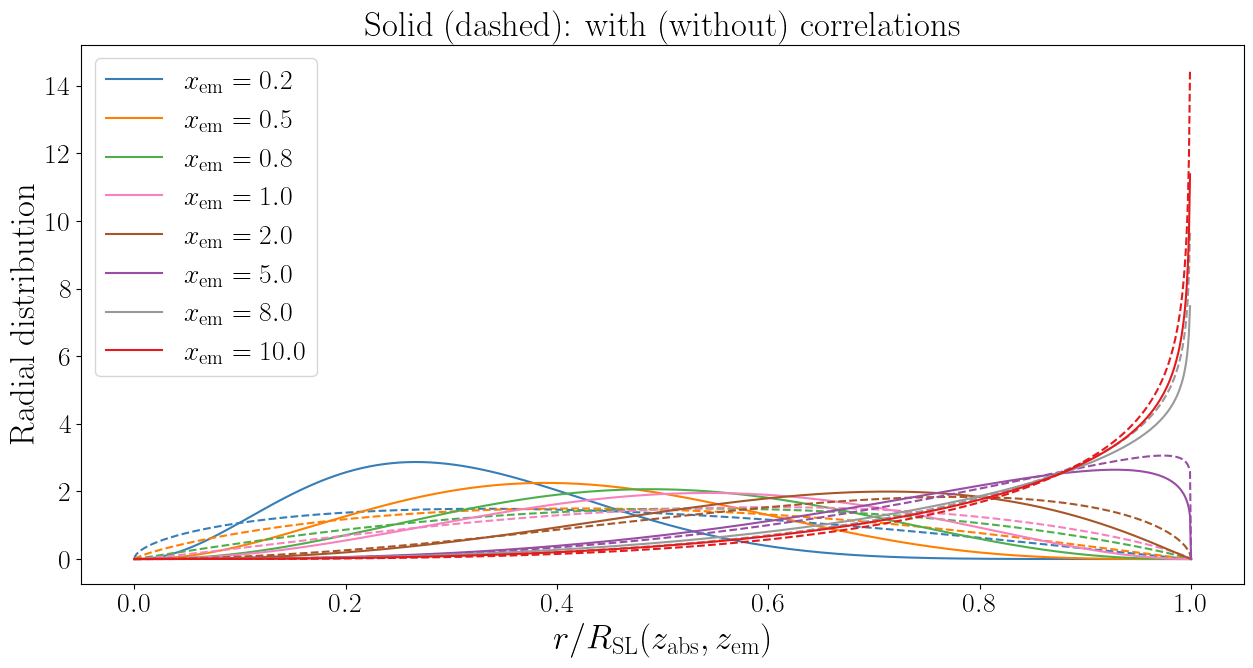

In [16]:
x_em_list = [0.2, 0.5, 0.8, 1., 2., 5., 8., 10.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_with_corr.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_without_corr.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title("Solid (dashed): with (without) correlations",fontsize=25);

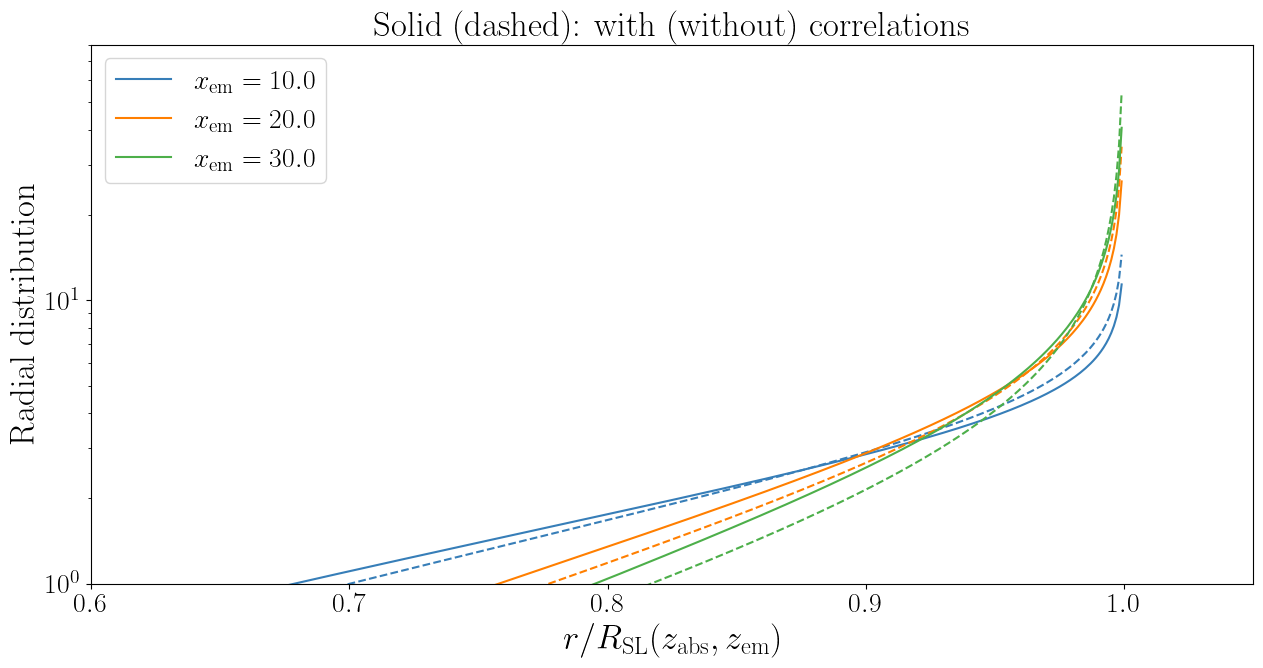

In [17]:
x_em_list = [10., 20., 30.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_with_corr.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_without_corr.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title("Solid (dashed): with (without) correlations",fontsize=25)
ax.set_yscale("log")
ax.set_xlim([0.6,1.05])
ax.set_ylim([1,80]);

### All effects

In [18]:
all_photons_data_with_effects = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    INCLUDE_VELOCITIES = True,
    INCLUDE_TEMPERATURE = True,
    ANISOTROPIC_SCATTERING = True,
    INCLUDE_RECOIL = True
)
all_photons_data_without_effects = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    INCLUDE_VELOCITIES = False,
    INCLUDE_TEMPERATURE = False,
    ANISOTROPIC_SCATTERING = False,
    INCLUDE_RECOIL = False
)

Now making interpolation tables...


100%|██████████| 1000/1000 [00:14<00:00, 69.04photons/s]


In [19]:
sim_data_with_effects = Multiple_scattering.SIM_DATA(all_photons_data_with_effects)
sim_data_without_effects = Multiple_scattering.SIM_DATA(all_photons_data_without_effects)

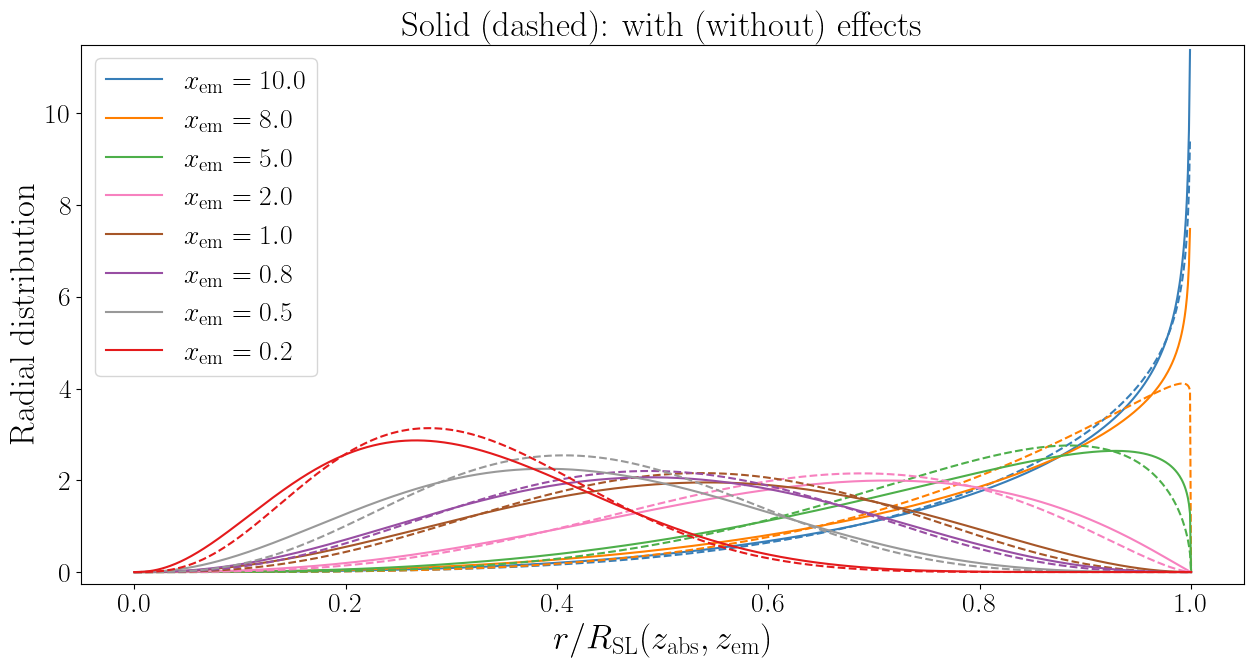

In [158]:
x_em_list = [0.2, 0.5, 0.8, 1., 2., 5., 8., 10.][::-1]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_with_effects.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_without_effects.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title("Solid (dashed): with (without) effects",fontsize=25);
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.25,11.5])
ax.legend(loc="upper left",fontsize=20)

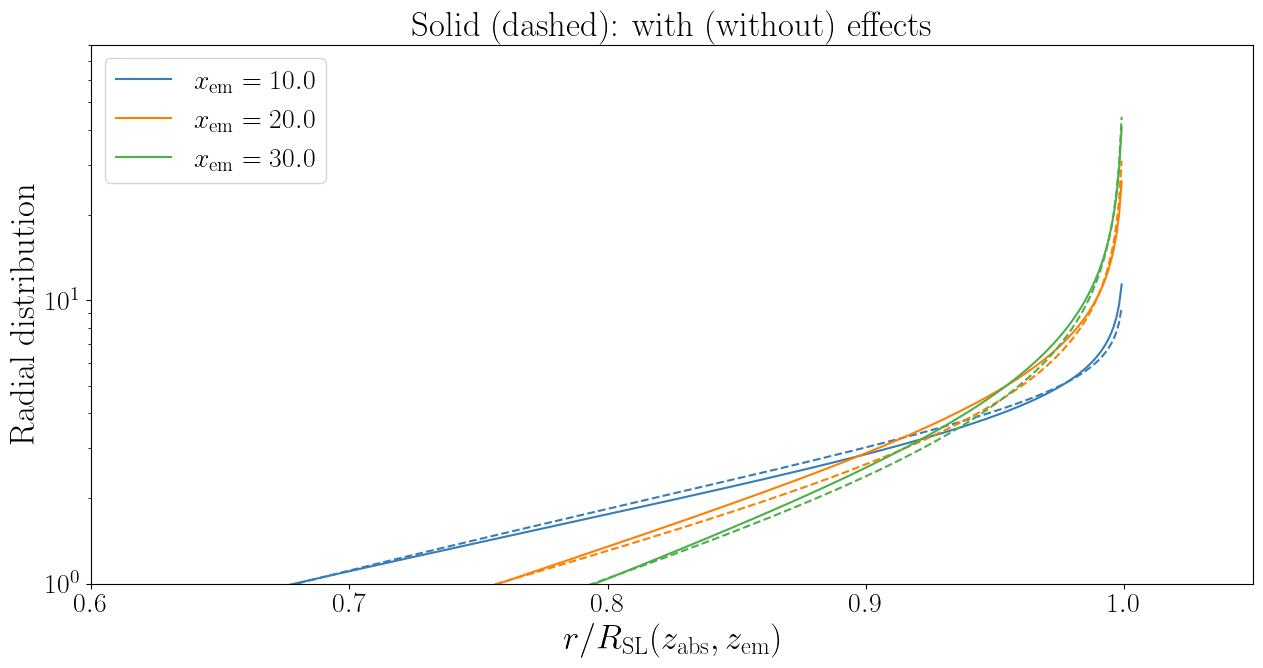

In [21]:
x_em_list = [10., 20., 30.]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_with_effects.plot_fit(x_em=x_em, ax=ax, color = colors[ind], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_without_effects.plot_fit(x_em=x_em, ax=ax, color = colors[ind], ls = '--')
ax.set_title("Solid (dashed): with (without) effects",fontsize=25);
ax.set_yscale("log")
ax.set_xlim([0.6,1.05])
ax.set_ylim([1,80]);

### Different $z_\mathrm{abs}$

In [22]:
all_photons_data_zabs10 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    z_abs = 10.,
)
all_photons_data_zabs20 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    z_abs = 20.,
)
all_photons_data_zabs30 = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    z_abs = 30.,
)

Now making interpolation tables...


100%|██████████| 1000/1000 [02:28<00:00,  6.72photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [01:51<00:00,  8.99photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [01:28<00:00, 11.27photons/s]


In [23]:
sim_data_zabs10 = Multiple_scattering.SIM_DATA(all_photons_data_zabs10)
sim_data_zabs20 = Multiple_scattering.SIM_DATA(all_photons_data_zabs20)
sim_data_zabs30 = Multiple_scattering.SIM_DATA(all_photons_data_zabs30)

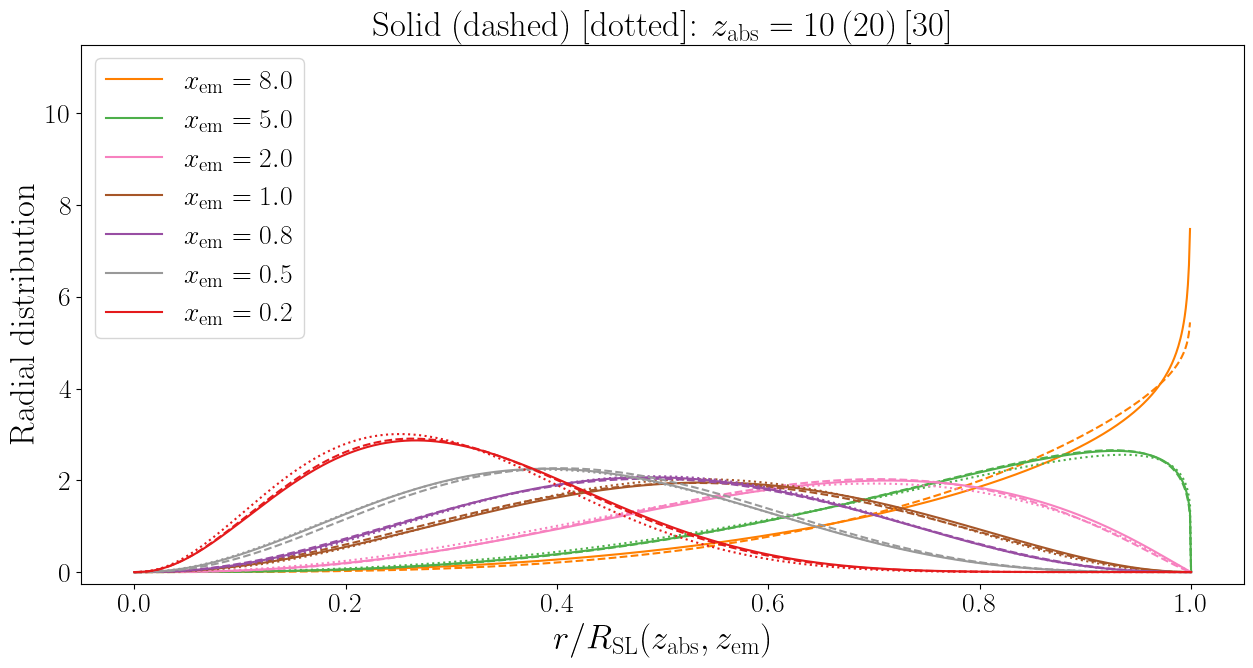

In [170]:
x_em_list = [0.2, 0.5, 0.8, 1., 2., 5., 8.][::-1]
fig, ax = plt.subplots(1, 1, figsize=(15,7))
for ind, x_em in enumerate(x_em_list):
    fig, ax = sim_data_zabs10.plot_fit(x_em=x_em, ax=ax, color = colors[ind+1], label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
    fig, ax = sim_data_zabs20.plot_fit(x_em=x_em, ax=ax, color = colors[ind+1], ls = '--')
    try:
        fig, ax = sim_data_zabs30.plot_fit(x_em=x_em, ax=ax, color = colors[ind+1], ls = ':')
    except ValueError:
        pass
ax.set_title("Solid (dashed) [dotted]: $z_\\mathrm{abs}"+f"={all_photons_data_zabs10.sim_params.z_abs:.0f}\\,({all_photons_data_zabs20.sim_params.z_abs:.0f})\\,[{all_photons_data_zabs30.sim_params.z_abs:.0f}]$",fontsize=25)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.25,11.5])
ax.legend(loc="upper left",fontsize=20);

## Fit data

In [25]:
sims_data = {}
z_abs_list = [5., 10., 15., 20., 25., 30.]
for z_abs in z_abs_list:
    all_photons_data = run_Lya_multiple_scattering(
        cosmo_params,
        sim_params,
        z_abs = z_abs,
    )
    sims_data[z_abs] = Multiple_scattering.SIM_DATA(all_photons_data)

Now making interpolation tables...


100%|██████████| 1000/1000 [03:21<00:00,  4.95photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [02:32<00:00,  6.56photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [02:06<00:00,  7.92photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [01:49<00:00,  9.13photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [01:40<00:00,  9.95photons/s]


Now making interpolation tables...


100%|██████████| 1000/1000 [01:29<00:00, 11.21photons/s]


In [26]:
alpha_lists = {}
beta_lists = {}
x_em_lists = {}
for z_abs, sim_data in sims_data.items():
    alpha_list = []
    beta_list = []
    x_em_list = np.arange(0.2, sim_data.x_list.max(),0.1)
    for x_em in x_em_list:
        dist_params, data_lims = sim_data.find_fitting_params(x_em=x_em)
        (alpha, beta) = dist_params
        alpha_list.append(alpha)
        beta_list.append(beta)
    alpha_lists[z_abs] = alpha_list
    beta_lists[z_abs] = beta_list
    x_em_lists[z_abs] = x_em_list

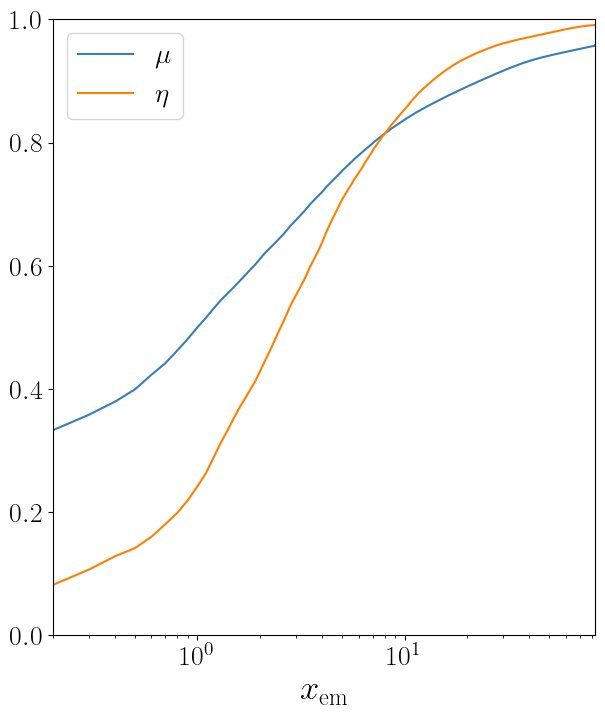

In [132]:
bad_inds = {5.: 20, 10.: 5, 15.: 2, 20.: 1, 25.: 1, 30.: 1}

def mu_fit(x_em):
    zeta_em = np.log10(x_em)
    if x_em > 30:
        mu = 1.-1.0478*pow(x_em,-0.7266)
    elif x_em > 3.:
        mu = -0.104*pow(zeta_em,5) + 0.4867*pow(zeta_em,4) - 0.8217*pow(zeta_em,3) + 0.4889*zeta_em*zeta_em + 0.264*zeta_em + 0.518
    else:
        mu = -0.0285*pow(zeta_em,5) + 0.087*pow(zeta_em,4) - 0.1205*pow(zeta_em,3) -0.0456*zeta_em*zeta_em +  0.3787*zeta_em + 0.5285
    return mu

def eta_fit(x_em):
    zeta_em = np.log10(x_em)
    if x_em > 20.:
        eta = 1. - 2.804*pow(x_em,-1.242)
    elif x_em > 3.:
        eta = 2.17*pow(zeta_em,5) - 8.832*pow(zeta_em,4) + 13.579*pow(zeta_em,3) - 10.04*zeta_em*zeta_em + 4.166*zeta_em -0.17
    else:
        eta = 0.352*pow(zeta_em,5) - 0.0516*pow(zeta_em,4) - 0.293*pow(zeta_em,3) + 0.342*zeta_em*zeta_em + 0.582*zeta_em + 0.266
    return eta

z_abs = 5.

alpha_array = np.array(alpha_lists[z_abs][:-bad_inds[z_abs]])
beta_array = np.array(beta_lists[z_abs][:-bad_inds[z_abs]])
x_em_array = np.array(x_em_lists[z_abs][:-bad_inds[z_abs]])


mu_array = alpha_array/(alpha_array + beta_array)
eta_array = alpha_array/(alpha_array + beta_array**2)
sigma_array = alpha_array*beta_array/(alpha_array + beta_array)**2 / (alpha_array + beta_array + 1.)

# Following lines were useful for finding the fit
'''
def my_func1(x_em,c1,c2):
    return 1.-c1*pow(x_em,-c2)

def my_func2(x_em,p_coeff):
    zeta_em = np.log10(x_em)
    return np.polyval(p_coeff,zeta_em)

inds = x_em_array > 20.
inds = np.logical_and(x_em_array >= 3., x_em_array <= 20.)
p_coeffs = np.polyfit(np.log10(x_em_array[inds]),eta_array[inds],deg=5)
c1, c2 = curve_fit(my_func1,x_em_array[inds], eta_array[inds],(3.,5.))[0]
print(c1,c2)
print(p_coeffs)
'''

mu_fit_array = np.array([mu_fit(x_em) for x_em in x_em_array])
eta_fit_array = np.array([eta_fit(x_em) for x_em in x_em_array])

'''
fig, ax = plt.subplots(2,1,figsize=(15,8),sharex=True, gridspec_kw={'height_ratios': [2., 1.]})
fig.subplots_adjust(hspace=0)
ax[0].semilogx(x_em_array,mu_array,color=colors[0],label='$\\mu$')
ax[0].semilogx(x_em_array,mu_fit_array,color=colors[0],ls='--')
ax[0].semilogx(x_em_array,eta_array,color=colors[1],label='$\\eta$')
ax[0].semilogx(x_em_array,eta_fit_array,color=colors[1],ls='--')
#ax[0].semilogx(x_em_array,sigma_array,color=colors[2],label='$\\sigma$')
ax[1].semilogx(x_em_array,mu_fit_array/mu_array-1.,color=colors[0])
ax[1].semilogx(x_em_array,eta_fit_array/eta_array-1.,color=colors[1])
ax[1].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].set_xlabel("$x_\\mathrm{em}$",fontsize=25)
ax[0].set_xlim([0.2,100])
ax[0].set_ylim([-0.05,1])
ax[1].set_ylim([-0.1,0.1])
ax[0].set_title("$z_\\mathrm{abs}="+f"{z_abs:.0f}$",fontsize=25)
ax[0].legend(fontsize=20);
'''
fig, ax = plt.subplots(1,1,figsize=(7,8))
ax.semilogx(x_em_array,mu_array,color=colors[0],label='$\\mu$')
ax.semilogx(x_em_array,eta_array,color=colors[1],label='$\\eta$')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel("$x_\\mathrm{em}$",fontsize=25)
ax.set_xlim([x_em_array.min(),x_em_array.max()])
ax.set_ylim([0.,1])
ax.legend(fontsize=20);

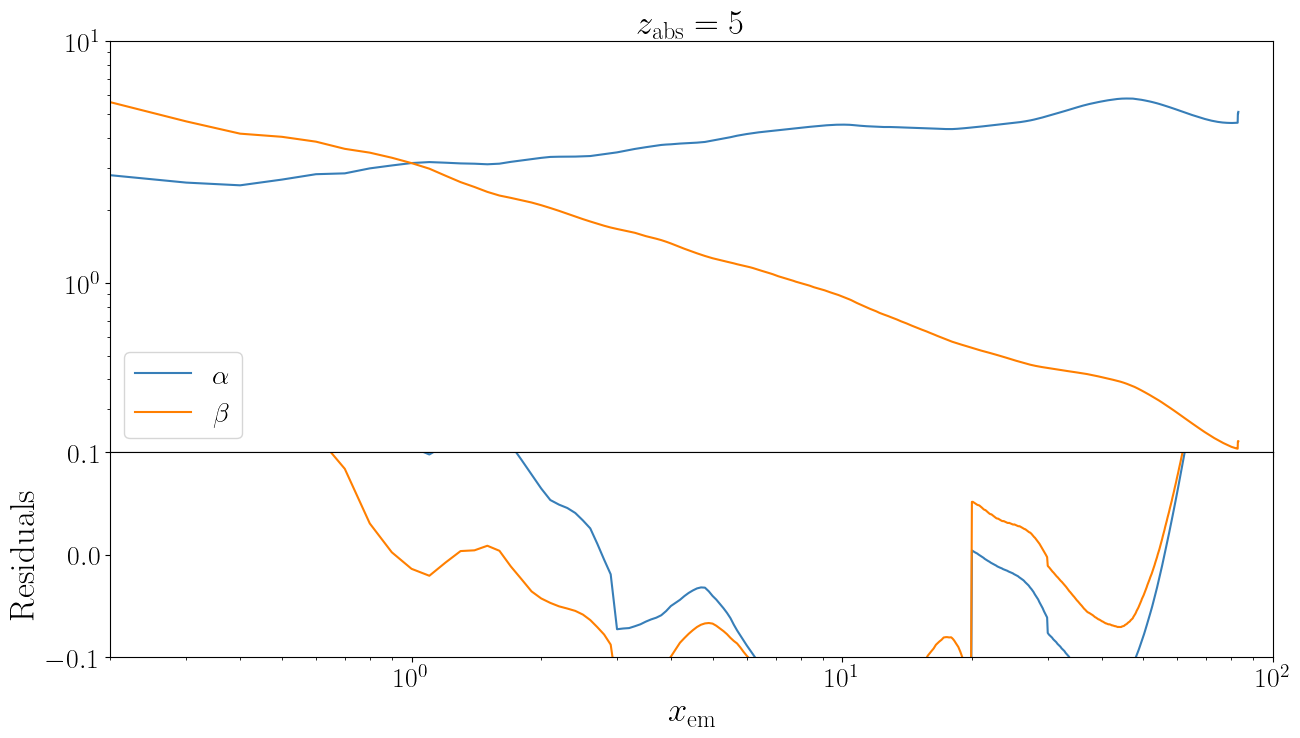

In [216]:
z_abs = 5.

alpha_array = np.array(alpha_lists[z_abs][:-bad_inds[z_abs]])
beta_array = np.array(beta_lists[z_abs][:-bad_inds[z_abs]])
x_em_array = np.array(x_em_lists[z_abs][:-bad_inds[z_abs]])

mu_fit_array = np.array([mu_fit(x_em) for x_em in x_em_array])
eta_fit_array = np.array([eta_fit(x_em) for x_em in x_em_array])

alpha_fit_array = (1./eta_fit_array-1.)/(1./mu_fit_array-1.)**2
beta_fit_array = (1./eta_fit_array-1.)/(1./mu_fit_array-1.)

fig, ax = plt.subplots(2,1,figsize=(15,8),sharex=True, gridspec_kw={'height_ratios': [2., 1.]})
fig.subplots_adjust(hspace=0)
ax[0].loglog(x_em_array,alpha_array,color=colors[0],label='$\\alpha$')
#ax[0].loglog(x_em_array,alpha_fit_array,color=colors[0],ls='--')
ax[0].loglog(x_em_array,beta_array,color=colors[1],label='$\\beta$')
#ax[0].loglog(x_em_array,beta_fit_array,color=colors[1],ls='--')
ax[1].semilogx(x_em_array,alpha_fit_array/alpha_array-1.,color=colors[0])
ax[1].semilogx(x_em_array,beta_fit_array/beta_array-1.,color=colors[1])
ax[1].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].set_xlabel("$x_\\mathrm{em}$",fontsize=25)
ax[1].set_ylabel("Residuals",fontsize=25)
ax[0].set_xlim([0.2,100])
ax[0].set_ylim([0.2,10])
ax[1].set_ylim([-0.1,0.1])
ax[0].set_title("$z_\\mathrm{abs}="+f"{z_abs:.0f}$",fontsize=25)
ax[0].legend(fontsize=20);

## Why Temperature doesn't matter?

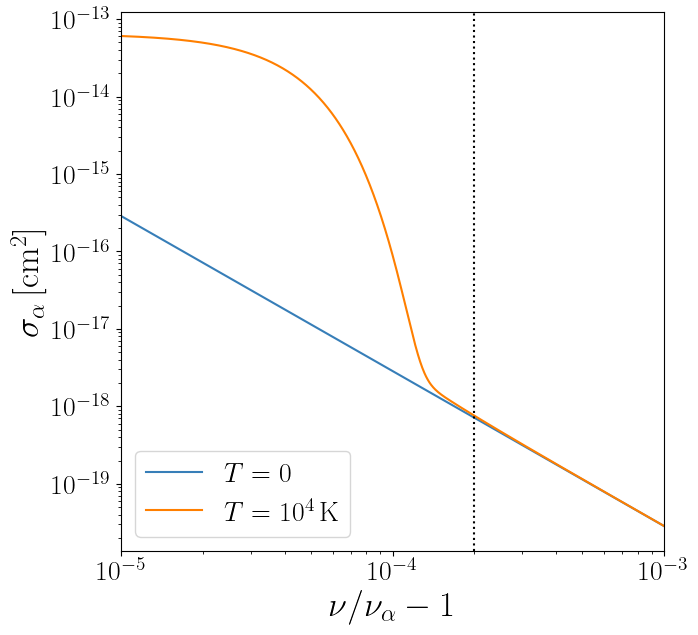

In [93]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
fig, ax = plot_cross_section(T=0, nu_min=1e-5, ax=ax,label='$T=0$')
fig, ax = plot_cross_section(T=1e4, nu_min=1e-5, ax=ax,label='$T=10^{4}\\,\\mathrm{K}$')
ax.axvline(2e-4,color='k',ls=':');

## Why velocities don't matter?

In [55]:
sim_data_velocity = Multiple_scattering.SIM_DATA(all_photons_data_with_v,quantity="velocity")

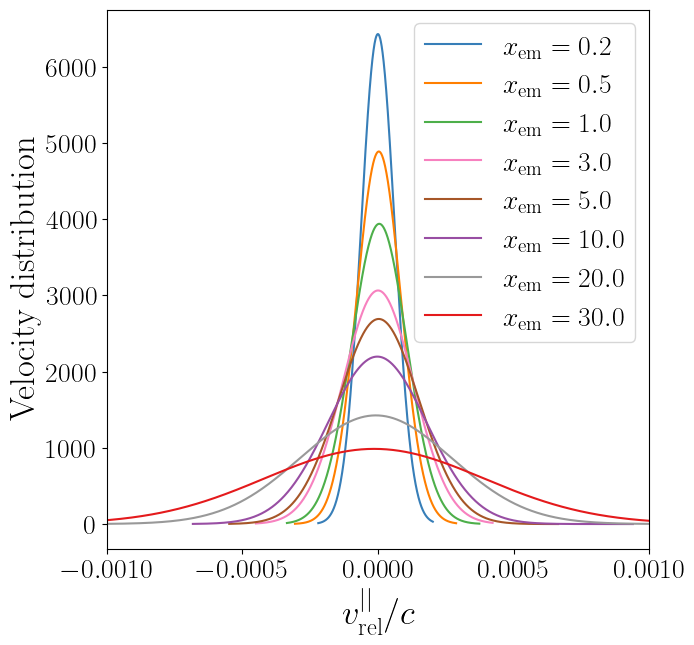

In [129]:
x_em_list = [0.2,0.5,1.,3.,5.,10.,20.,30.]
fig, ax = plt.subplots(1, 1, figsize=(7,7))
for x_em in x_em_list:
    fig, ax = sim_data_velocity.plot_fit(x_em=x_em, ax=ax, label="$x_\\mathrm{em}="+f"{x_em:.1f}$")
ax.set_xlim([-1e-3,1e-3]);

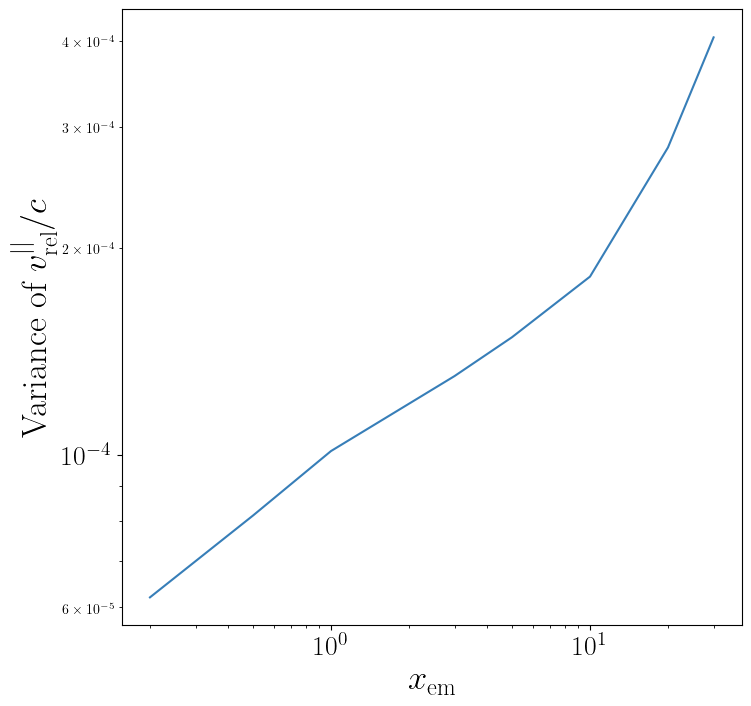

In [67]:
x_em_list = [0.2,0.5,1.,3.,5.,10.,20.,30.]
sigma_list = []
for x_em in x_em_list:
    dist_params, data_lims = sim_data_velocity.find_fitting_params(x_em=x_em)
    (mu, sigma) = dist_params
    sigma_list.append(sigma)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.loglog(x_em_list,sigma_list)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel("$x_\\mathrm{em}$",fontsize=25)
ax.set_ylabel("Variance of $v_\\mathrm{rel}^{||}/c$",fontsize=25);

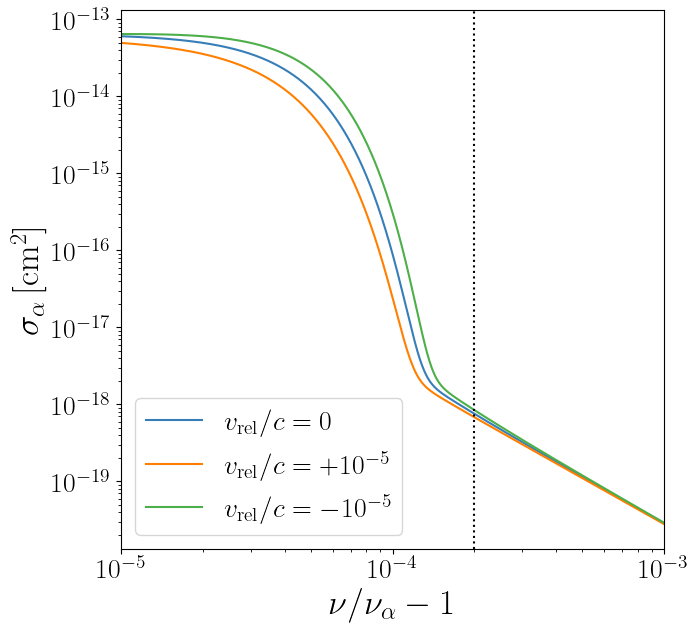

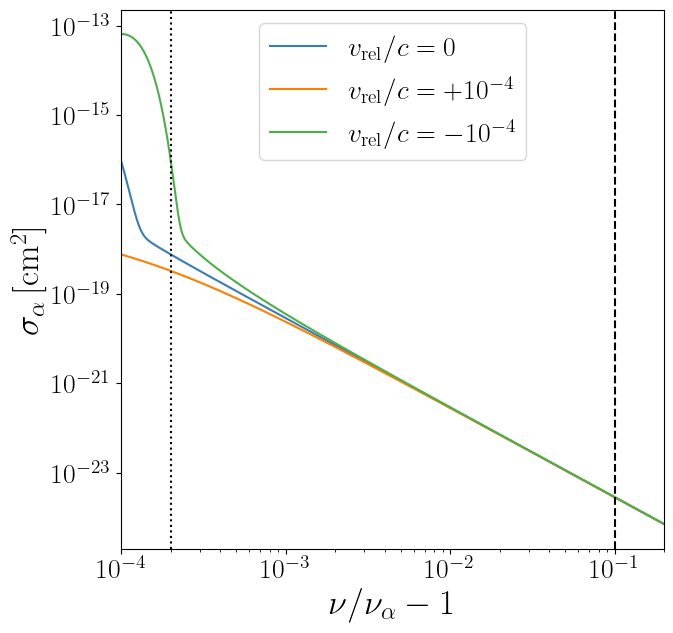

In [92]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
fig, ax = plot_cross_section(T=1e4, nu_min=1e-5, ax=ax,label='$v_\\mathrm{rel}/c=0$')
fig, ax = plot_cross_section(T=1e4, nu_min=1e-5, velocity=1e-5,ax=ax,label='$v_\\mathrm{rel}/c=+10^{-5}$')
fig, ax = plot_cross_section(T=1e4, nu_min=1e-5, velocity=-1e-5,ax=ax,label='$v_\\mathrm{rel}/c=-10^{-5}$')
ax.axvline(2e-4,color='k',ls=':');

fig, ax = plt.subplots(1,1,figsize=(7,7))
fig, ax = plot_cross_section(T=1e4, nu_min=1e-4, nu_max=2e-1, ax=ax,label='$v_\\mathrm{rel}/c=0$')
fig, ax = plot_cross_section(T=1e4, nu_min=1e-4, nu_max=2e-1, velocity=1e-4,ax=ax,label='$v_\\mathrm{rel}/c=+10^{-4}$')
fig, ax = plot_cross_section(T=1e4, nu_min=1e-4, nu_max=2e-1, velocity=-1e-4,ax=ax,label='$v_\\mathrm{rel}/c=-10^{-4}$')
ax.axvline(2e-4,color='k',ls=':')
ax.axvline(1e-1,color='k',ls='--');

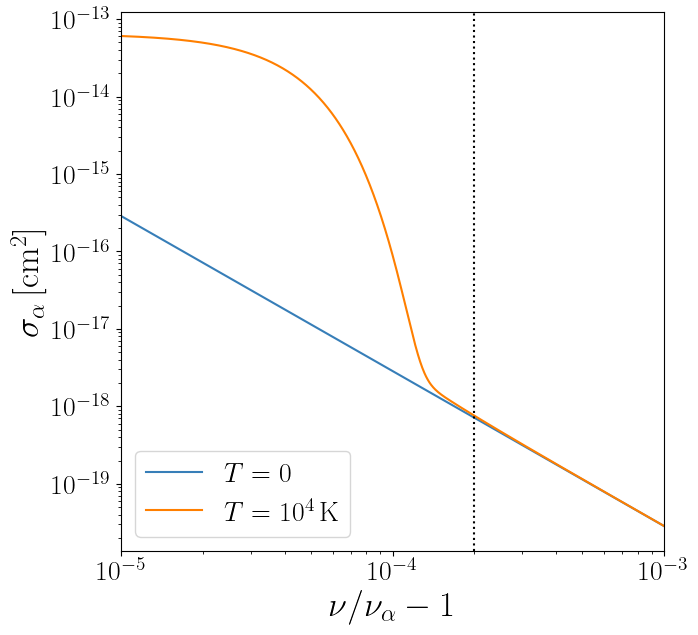

In [167]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
fig, ax = plot_cross_section(T=0, nu_min=1e-5, ax=ax,label='$T=0$')
fig, ax = plot_cross_section(T=1e4, nu_min=1e-5, ax=ax,label='$T=10^{4}\\,\\mathrm{K}$')
ax.axvline(2e-4,color='k',ls=':');

In [140]:
all_photons_data = run_Lya_multiple_scattering(
    cosmo_params,
    sim_params,
    N = 5, INCLUDE_VELOCITIES=False
)

100%|██████████| 5/5 [00:00<00:00, 21.84photons/s]


In [141]:
all_photons_data.Delta_nu

np.float64(3.8705509768305574e-05)

python(86332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(86333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(86334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(86336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


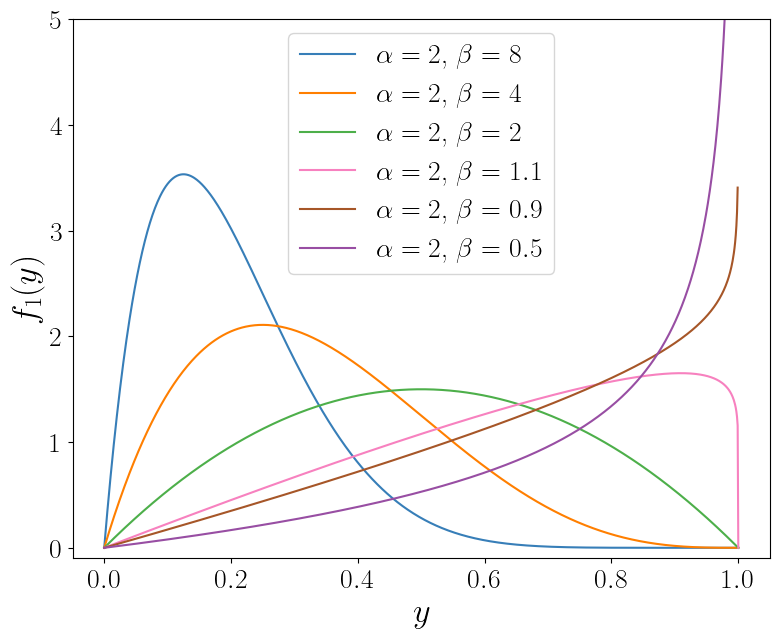

In [186]:
from scipy.stats import beta as beta_dist

alpha_list = [2, 2, 2, 2, 2, 2, 2]
beta_list = [8, 4, 2, 1.1, 0.9, 0.5]
fig, ax = plt.subplots(1,1,figsize=(9,7))
x_array = np.linspace(0,1,1000)
for alpha, beta in zip(alpha_list, beta_list):
    ax.plot(x_array, beta_dist.pdf(x_array,alpha,beta),label=f"$\\alpha={alpha}$, $\\beta={beta}$")
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylim([-0.1,5])
ax.set_xlabel("$y$",fontsize=25)
ax.set_ylabel("$f_1(y)$",fontsize=25)
ax.legend(fontsize=20);

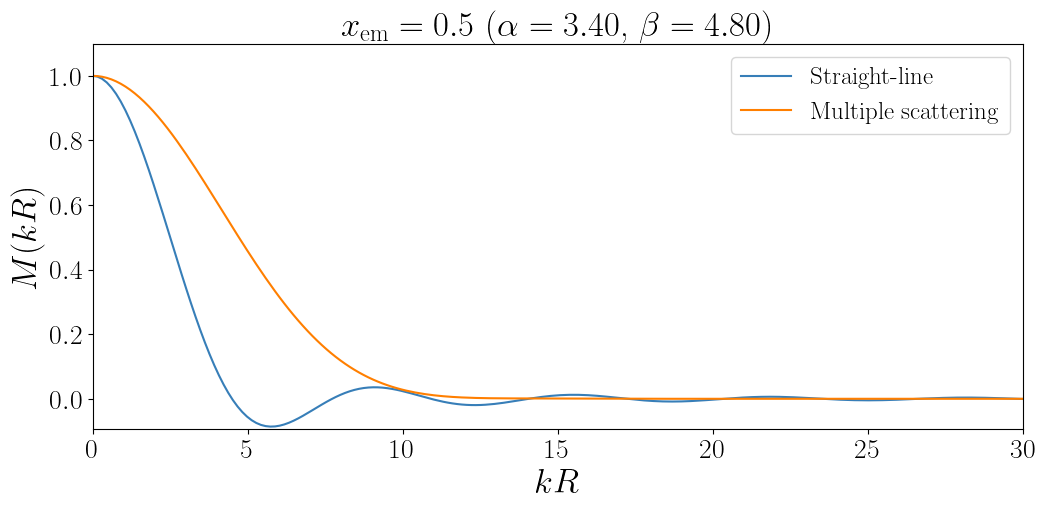

In [212]:
import mpmath

def new_window_function(kR,alpha,beta):
    if kR == 0.:
        return 1.
    else:
        return mpmath.hyper([(2.+alpha)/2.,(3.+alpha)/2.],[5./2.,(2.+alpha+beta)/2.,(3.+alpha+beta)/2.],-0.25* kR**2)

def old_window_function(kR):
    # Second order taylor expansion around kR_outer==0
    if (kR < 1e-4):
        return 1. - kR * kR / 10
    return 3.0 / (pow(kR, 3)) * (np.sin(kR) - np.cos(kR) * kR)

x_em = 0.5

mu = mu_fit(x_em)
eta = eta_fit(x_em)

alpha = (1./eta-1.)/(1./mu-1.)**2
beta = (1./eta-1.)/(1./mu-1.)

fig, ax = plt.subplots(1, 1, figsize=(12,5))
kR_array = np.linspace(0,30,200)
W0_array = np.array([old_window_function(kR) for kR in kR_array])
W1_array = np.array([new_window_function(kR,alpha,beta) for kR in kR_array])

ax.plot(kR_array,W0_array,label='Straight-line')
ax.plot(kR_array,W1_array,label='Multiple scattering')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim([np.min(kR_array),np.max(kR_array)])
ax.set_ylim([1.1*np.min(W0_array[1:]),1.1*np.max(W0_array[1:])])
ax.set_ylabel('$M(kR)$',fontsize=25)
ax.set_xlabel('$kR$',fontsize=25)
ax.set_title("$x_\\mathrm{em}=" + f"{x_em}$ " + f"($\\alpha={alpha:.02f}$, $\\beta={beta:.02f}$)",fontsize=25)
ax.legend(fontsize=18);